In [2]:
import os
import numpy as np
from scipy import constants as const 
import matplotlib.pyplot as plt
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.dielectric import DielectricConstant
# import mdtraj as md
import matplotlib.pyplot as plt
plt.style.use(['science', "no-latex", "ieee"])


/home/boittier/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
N_step = size(mat,1) ;            %  620
avg = sum(mat(:,2))/N_step ;
avfl = sum(mat(:,3))/N_step ;
last_200_steps = (N_step -  420) ;% last 1 ns (200*5000)
avg1ns = sum(mat( 421:N_step,2))/last_200_steps ;
avfl1ns = sum(mat( 421:N_step,3))/last_200_steps ; 
N_mol = 512;

%CONSTANTS
Avogadro_const = 6.02214129*10^(23) ;    % mol-1 NIST
Boltzman_const = 1.38064852*10^(-23) ;   % J K-1 NIST 
Gas_const      = 8.3144621 ;             % J K^−1 mol^−1
Cal2Joule      = 4.184 ;                 % J
J2kcm          = 1.43932643164436e+20;
atm2Pa         = 101325;
ang2m          = 10^(-10);
Pa2atm         =1/atm2Pa;


P=1 * atm2Pa ; %Pa, SI

%=== isothermal compressibility, k
for i = 1:N_step

   V(i)=mat(i,2);                % Ang^3
%  V(i)=V(i)*ang2m^3;            % m^3

endfor

V1 = mean(V.**2) ;
Vavg = mean(V) ;
V2=Vavg*Vavg ;

kappa=(V1-V2)*ang2m^3/(Boltzman_const*298.15*Vavg) ; %Pa^-1
kappa = kappa*10^6/(Pa2atm)                          % 10^6 atm^-1
%===================================================================================

In [9]:
def process_dyna(path, skip=1000):
    with open(path) as f:
        lines = f.readlines()
        lines = lines[skip:]
        time = np.array([float(x.split()[2]) for x in lines])
        energy = np.array([float(x.split()[3]) for x in lines])
        temp = np.array([float(x.split()[-1]) for x in lines])
    return time, energy, temp
        
    
def plot_energy_temperature(path, ax1, ax2, title):
    time, energy, temp = process_dyna(path)
    
    ax1.plot(time, energy)
    ax1.set_title(title)
    ax1.set_xlim(250, time[-1])
    m_energy = np.mean(energy)
    sd_energy = np.std(energy)
    ax1.set_ylim(m_energy-4*sd_energy, m_energy+4*sd_energy)
    
    ax2.plot(time, temp)
    ax2.set_xlim(250, time[-1])
    m_temp = np.mean(temp)
    sd_temp = np.std(temp)
    print(title, m_temp)
    ax2.set_title(title)
    ax2.set_ylim(m_temp-4*sd_temp, m_temp+4*sd_temp)
    
def plot_run(path):
    subdirs = os.listdir(path)
    N_subdirs = len(subdirs)
    
    fig = plt.figure(figsize=(5, 8))
    gs = fig.add_gridspec(N_subdirs, 2, hspace=1.5, wspace=0.5)
    axs = gs.subplots(sharex="col")
    
    for i, subdir in enumerate(subdirs):
        path_ = os.path.join(path, subdir, "dyna.raw") 
        plot_energy_temperature(path_, axs[i,0], axs[i,1], subdir)
        
    plt.savefig("run.pdf", bbox_inches="tight")
    
    
    

t245.0 245.0516276932039
t270.0 269.9963569524272
t298.15 298.16574597766987
t310.0 310.0674478310679


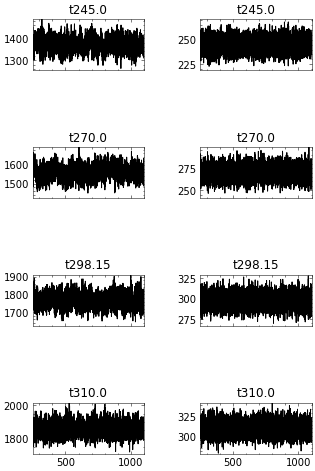

In [22]:
data_path = "/home/boittier/data/param/methanol/charmm/r3.1"
plot_run(data_path)

    

t245.0 245.0024159854369
t270.0 269.98699250873784
t298.15 298.1951502135922
t310.0 309.9519669019418


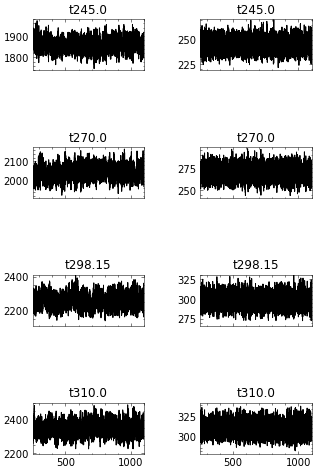

In [23]:
data_path = "/home/boittier/data/param/methanol/fmdcm/r3.1"
plot_run(data_path)

t240 272.9877953039088
t260 273.12410115309444
t280 273.1380790775244
t290 273.1950216794788
t300 273.273437395114
t310 273.2831013912052
t320 273.33279992801306
t340 273.35077369967433


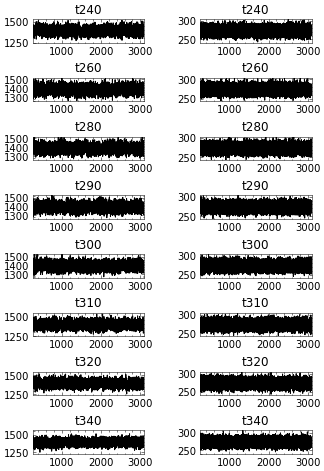

In [105]:
data_path = "/home/boittier/data/param/methanol/charmm/r1"
plot_run(data_path)
